In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits # this gets installe automatically once you install matplotlib

%matplotlib inline

In [2]:
# read training data 

train = pd.read_csv('data/kc_house_data.csv')
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Lets see which are the top selling houses in number of bedrooms

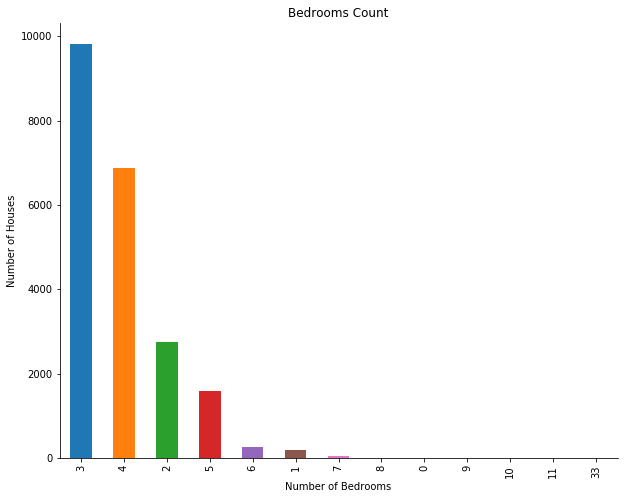

In [4]:
plt.figure(figsize=(10,8))
train["bedrooms"].value_counts().plot(kind="bar")
plt.title("Bedrooms Count")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Houses")
sns.despine()

So from above 3 and 4 bedroom are the top selling.

Lets see which areas they are getting mostly sold; We can use lat , long data from the dataset

c:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

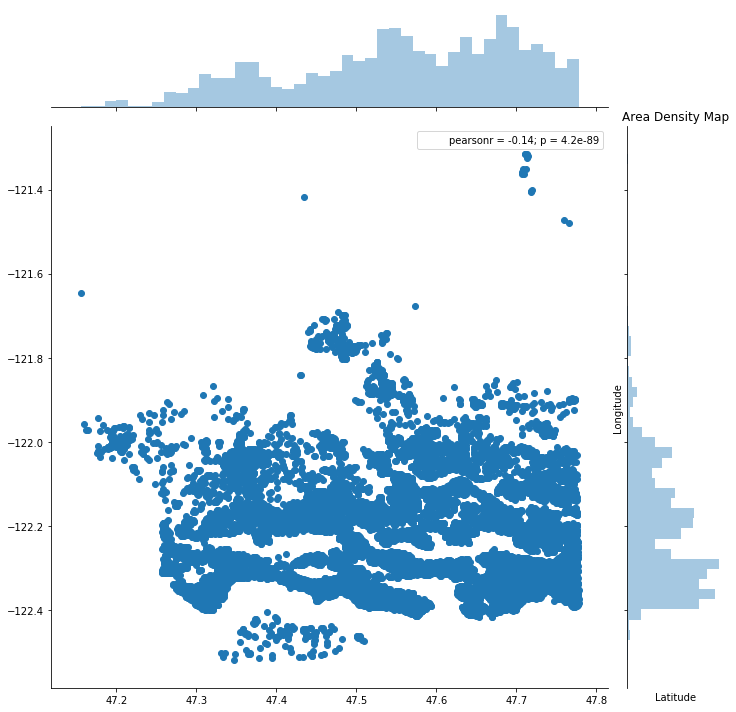

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize=(10,10))
sns.jointplot(x=train.lat.values, y=train.long.values, size=10)
plt.title("Area Density Map")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()
sns.despine()

Text(0.5,1,'Prices Vs SquareFoot')

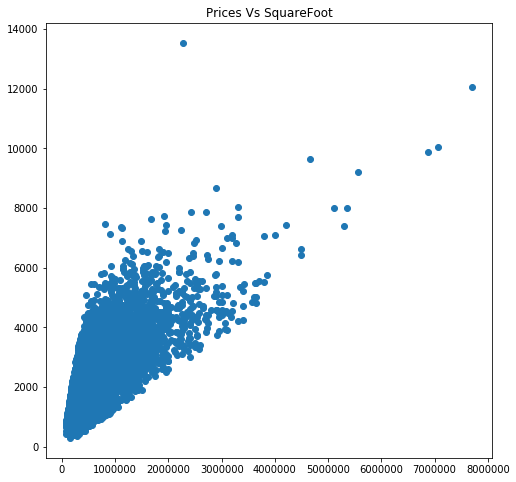

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(train.price,train.sqft_living)
plt.title("Prices Vs SquareFoot")

Here we can observe that the house with highest sqaure foot is not the costliest once, instead it is around 12000 square foot.

Text(0.5,1,'Floor Vs Prices')

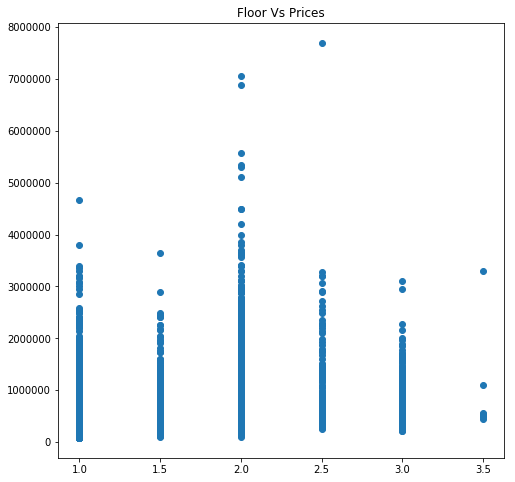

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(train.floors, train.price)
plt.title("Floor Vs Prices")

Text(0.5,1,'Prices Vs Latitude')

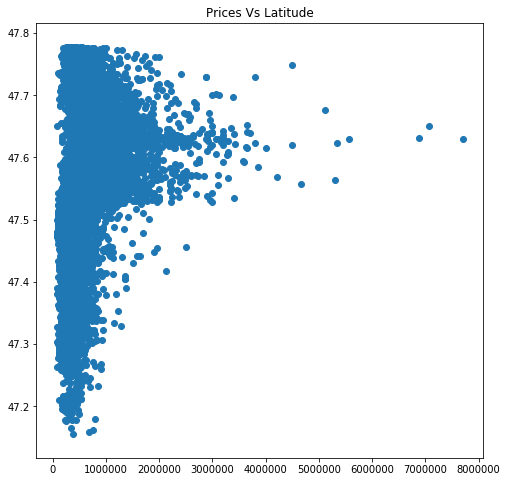

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(train.price,train.lat)
plt.title("Prices Vs Latitude")

The costliest are falling in 47.6 and 47.7 latitude 

Max Price :


7700000.0

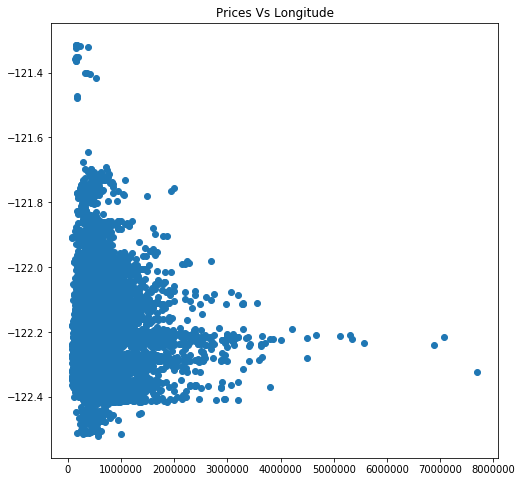

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(train.price,train.long)
plt.title("Prices Vs Longitude")

print("Max Price :" )
max(train.price)

Here the costiest are falling in -122.2 to -122.4

Text(0.5,1,'BedRooms Vs Prices')

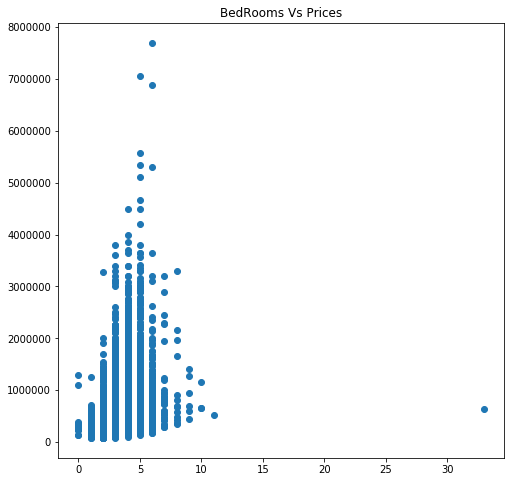

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(train.bedrooms, train.price)
plt.title("BedRooms Vs Prices")

Text(0.5,1,'Year Built Vs Price')

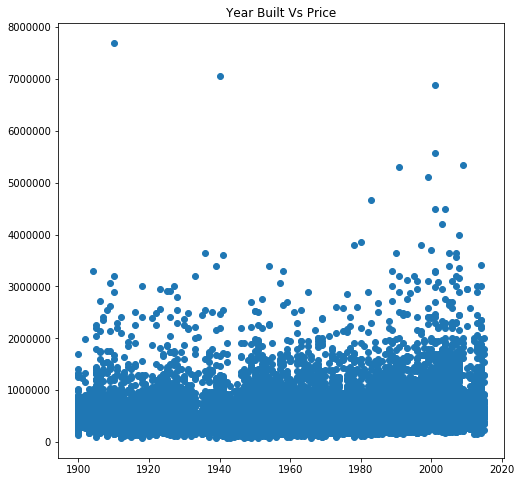

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(train.yr_built, train.price)
plt.title("Year Built Vs Price")

Text(0.5,1,'ZipCode Vs Price')

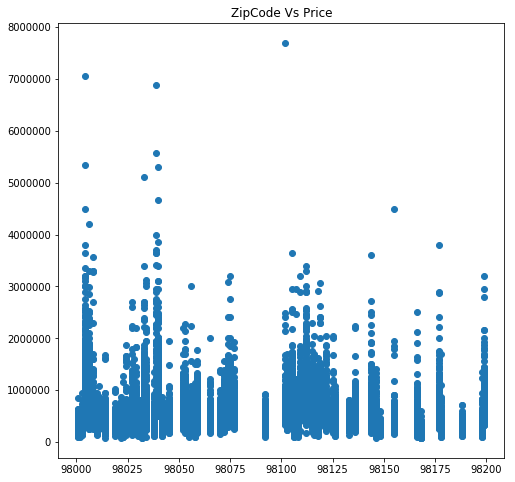

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(train.zipcode, train.price)
plt.title("ZipCode Vs Price")

<h4>Enough comparisions!!! Lets stop here and create the model</h4>

We will be using Linear Regression as the Algorithm here; Linear regressions is termed as a model which can predict furture based upon the past relations between the variables. For scattered plots with data points placed lineraly Linear regressions is helpful. 

Regression works on the line equation , <b>*y=mx+c*</b> , trend line is set through the data points to predict the outcome.

<h4>Example :</h4>
<img src="http://onlinestatbook.com/2/regression/graphics/gpa.jpg"/>

Here in y=mx+c

Y is called the criterion; the variable which we need to predict.<br/>
X is called the predictor; the one on which we base to find out the criterion.

If we are using only one predictor then it is called Simple regression and if we are using mulitple predictors to predict it is called as Multiple regression.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linear = LinearRegression()

In [15]:
labels = train["price"]

In [16]:
rev_dates = [1 if values == 2014 else 0 for values in train.date]

In [17]:
train["date"] = rev_dates

In [18]:
train_temp = train.drop(["id","price"], axis=1)
train_temp.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Lets create train and test data from the data set we have using train_test_split module 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(train_temp, labels, test_size=0.10, random_state=2)

In [21]:
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
linear.score(x_test,y_test)

0.7320342760357736

<h4>This model has failed to reach the 85% bench mark I set; So lets continue using some other better model <br/> to boost this to reach the 85% mark</h4>